In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
#from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score

filename ='data/star_classification.csv'
sdss17_df_raw = pd.read_csv(filename)

num_rows = np.shape(sdss17_df_raw)[0]
num_cols = np.shape(sdss17_df_raw)[1]
print(f"DataFrame Initially has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

print(f"The Cols are:", end="\n\n")
print(sdss17_df_raw.dtypes)

DataFrame Initially has #Cols:100000 and #Rows:18

The Cols are:

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


In [61]:
sdss17_df = sdss17_df_raw.drop(['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'spec_obj_ID', 'MJD', 'plate'], axis = 1)

In [62]:
# Remove Very Bright Objects
sdss17_df_no_anomaly = sdss17_df[sdss17_df['u'] > -1]

num_rows = np.shape(sdss17_df_no_anomaly)[0]
num_cols = np.shape(sdss17_df_no_anomaly)[1]
print(f"DataFrame now has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

DataFrame now has #Cols:99999 and #Rows:7



In [63]:
sdss17_features = sdss17_df_no_anomaly.drop('class', axis=1, inplace=False)
sdss17_class_categorical = sdss17_df_no_anomaly['class']
classes = sdss17_class_categorical.unique() # redundant - should be created earlier

print(sdss17_features.columns)
print(sdss17_class_categorical)

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')
0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 99999, dtype: object


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    sdss17_features,
    sdss17_class_categorical,
    test_size=0.33,
    random_state=1000)

In [69]:
def show_confmatrix(name, y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)# Y_test
    # Create heatmap from the confusion matrix
    class_names=['GALAXY', 'QSO', 'STAR'] # name  of classes
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label'); plt.xlabel('Predicted label')
    tick_marks = [0.5, 1.5, 2.5]
    plt.yticks(tick_marks, class_names)
    plt.xticks(tick_marks, class_names)
    
    figname=f"{name}_conf_mat"
    plt.savefig(f"img/{figname}.png")
    plt.show()



def pipeline_predict(pipeline):
    """
    Train and evaluate pipelines with test set.
    
    Input:
    ------
    
    pipeline: list of lists. Each sub-list is the pipeline, where the first
    element is the pipeline name (str).
    
    Output:
    -------
    
    string: name, precision, recall, f1 score, accuracy
    
    """
    pipeline: list
    name=pipeline[0]
    model = make_pipeline(*pipeline[1:])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("Precision for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[0])
    print("Recall for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[1])
    print("F1 for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[2])
    print("Balanced accuracy (av recall):", balanced_accuracy_score(y_test, y_pred))
    
    show_confmatrix(name, y_test, y_pred)

------
SMOTE+RF
Precision for each class [0.98252318 0.94299517 0.99511446]
Recall for each class [0.98032537 0.94451613 0.99985975]
F1 for each class [0.98142305 0.94375504 0.99748146]
Balanced accuracy (av recall): 0.9749004150531455


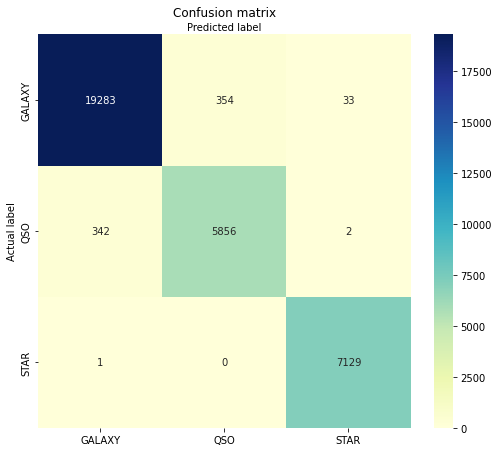

------
RO+RF
Precision for each class [0.98055302 0.95376291 0.99608665]
Recall for each class [0.98434164 0.93822581 0.99957924]
F1 for each class [0.98244368 0.94593056 0.99782989]
Balanced accuracy (av recall): 0.974048895366345


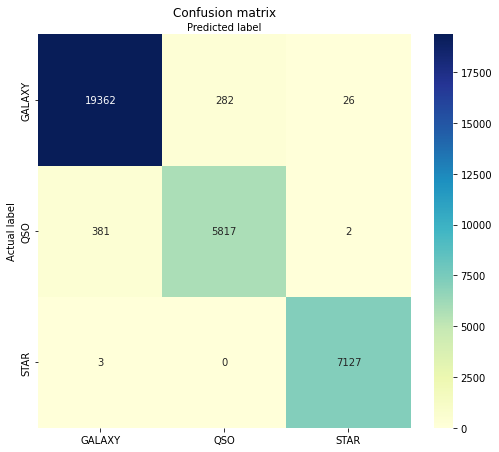

------
SMOTEENN+RF
Precision for each class [0.9850096  0.91897356 0.97791798]
Recall for each class [0.96542959 0.95306452 1.        ]
F1 for each class [0.97512131 0.93570863 0.98883573]
Balanced accuracy (av recall): 0.9728313681114736


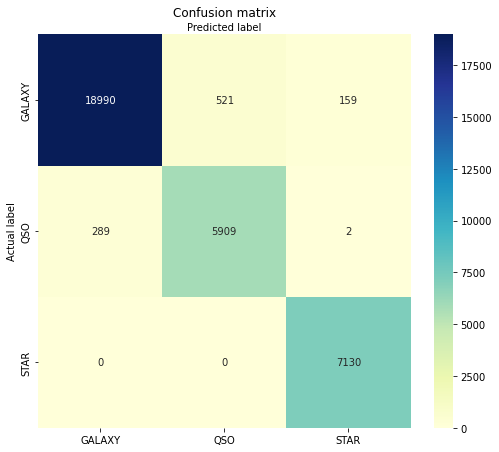

------
SMOTE+ET
Precision for each class [0.9815383  0.94973975 0.97656892]
Recall for each class [0.97574987 0.94177419 0.99957924]
F1 for each class [0.97863553 0.9457402  0.98794012]
Balanced accuracy (av recall): 0.9723677696960104


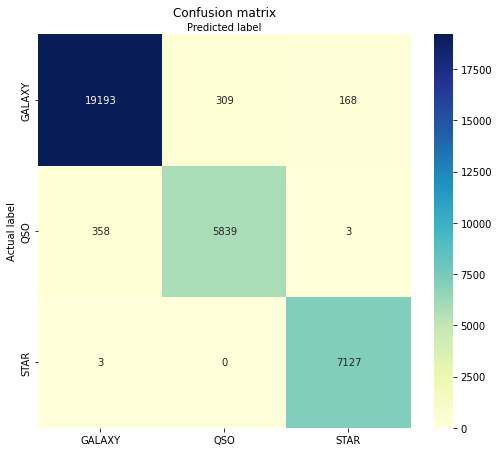

------
RO+ET
Precision for each class [0.97680178 0.96797573 0.97857437]
Recall for each class [0.98256228 0.92629032 0.99929874]
F1 for each class [0.97967356 0.94667436 0.98882798]
Balanced accuracy (av recall): 0.9693837792962089


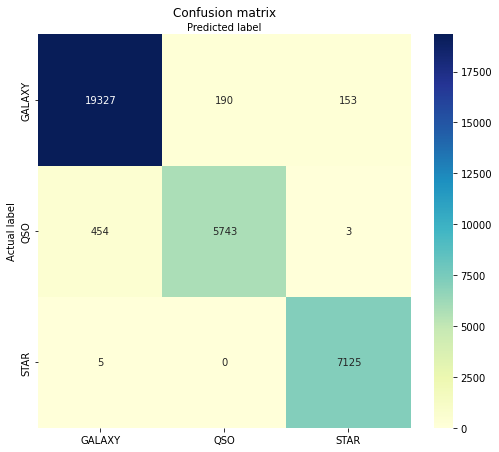

------
SMOTEENN+ET
Precision for each class [0.9837027  0.93010753 0.96193818]
Recall for each class [0.96354855 0.94870968 0.99957924]
F1 for each class [0.97352133 0.93931651 0.98039755]
Balanced accuracy (av recall): 0.9706124903830453


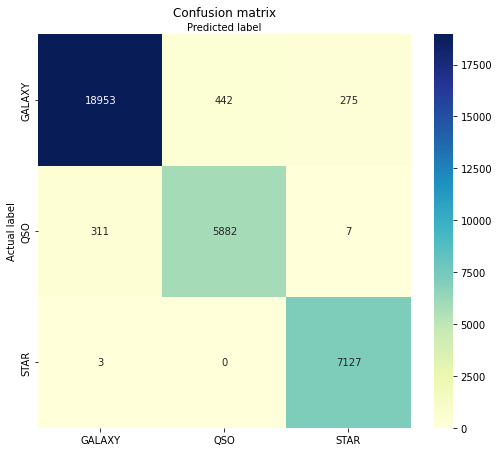

------
Log Reg
Precision for each class [0.96371686 0.9390411  0.94872819]
Recall for each class [0.96278597 0.88451613 0.99915849]
F1 for each class [0.96325119 0.91096346 0.97329053]
Balanced accuracy (av recall): 0.9488201942618897


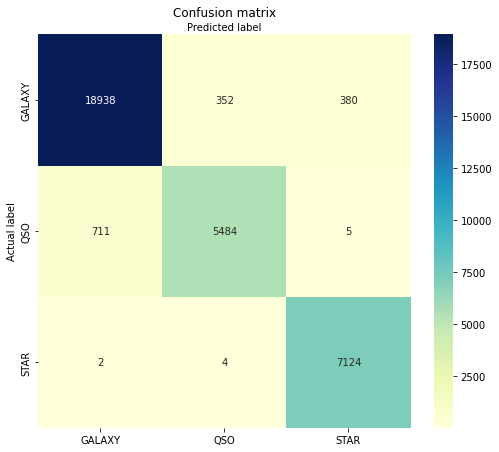

In [71]:

    
#'rfc__min_samples_split': 4, 'rfc__n_estimators': 500}
#smote = ['SMOTE', SMOTE(random_state=1000), RandomForestClassifier(n_estimators=1000, max_features='sqrt')]
#roversample = ['Random Oversampling', RandomOverSampler(random_state=1000), RandomForestClassifier(n_estimators=1000, max_features='sqrt')]

rfsmote = ['SMOTE+RF', SMOTE(random_state=0),
           RandomForestClassifier(min_samples_split=4, n_estimators=500)
          ]

rfoversample = ['RO+RF', RandomOverSampler(random_state=0),
                RandomForestClassifier(min_samples_split=2, n_estimators=1000)
               ]



rfsmoteenn = ['SMOTEENN+RF', SMOTEENN(random_state=0),
              RandomForestClassifier(min_samples_split=4, n_estimators=1000)
             ]

etsmote = ['SMOTE+ET', SMOTE(random_state=0),
           ExtraTreesClassifier(min_samples_split=4, n_estimators=500)
          ]

etoversample = ['RO+ET', RandomOverSampler(random_state=0),
                ExtraTreesClassifier(min_samples_split=2, n_estimators=1000)
               ]



etsmoteenn = ['SMOTEENN+ET', SMOTEENN(random_state=0),
              ExtraTreesClassifier(min_samples_split=2, n_estimators=500)
             ]


logreg = ['Log Reg', StandardScaler(), LogisticRegression()]

pipelines = [rfsmote, rfoversample, rfsmoteenn, etsmote, etoversample, etsmoteenn, logreg]

for pipe in pipelines:
    print("------")
    pipeline_predict(pipe)